In [551]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
from eda_module import *
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
data = pd.read_csv('churn_data.csv')
df = data.copy()

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [149]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [150]:
# make all column names lowercase
df.columns = map(str.lower, df.columns)
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [151]:
#Print number of rows in DF
print(f"Rows: {df.shape[0]} \n")
#Print number of features in DF
print(f"Features: {df.shape[1]} \n")
#Print total number of missing values
print(f"Missing Values: {df.isnull().values.sum()} \n")
#Print number of unique values per feature location
print(f"Unique Values: {df.nunique()} \n")

Rows: 7043 

Features: 21 

Missing Values: 0 

Unique Values: customerid          7043
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64 



# **Our Data**
We have 7043 rows (each representing a unique customer) with 21 columns:     19 features, 1 target feature (Churn)
### **Target:**
- Churn (binary)
    
### **Nominal Features:**
- Tenure
- MonthlyCharges
- TotalCharges
    
### **Categorical Features:**
- Gender
- SeniorCitizen
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
    

# **1. General EDA**

## 1.1 Target: Churn

In [152]:
# Replace all missing string values with 0
df.totalcharges = df.totalcharges.replace(" ", 0)
# Change totalcharges type from string to float
df.totalcharges = df.totalcharges.astype('float32')

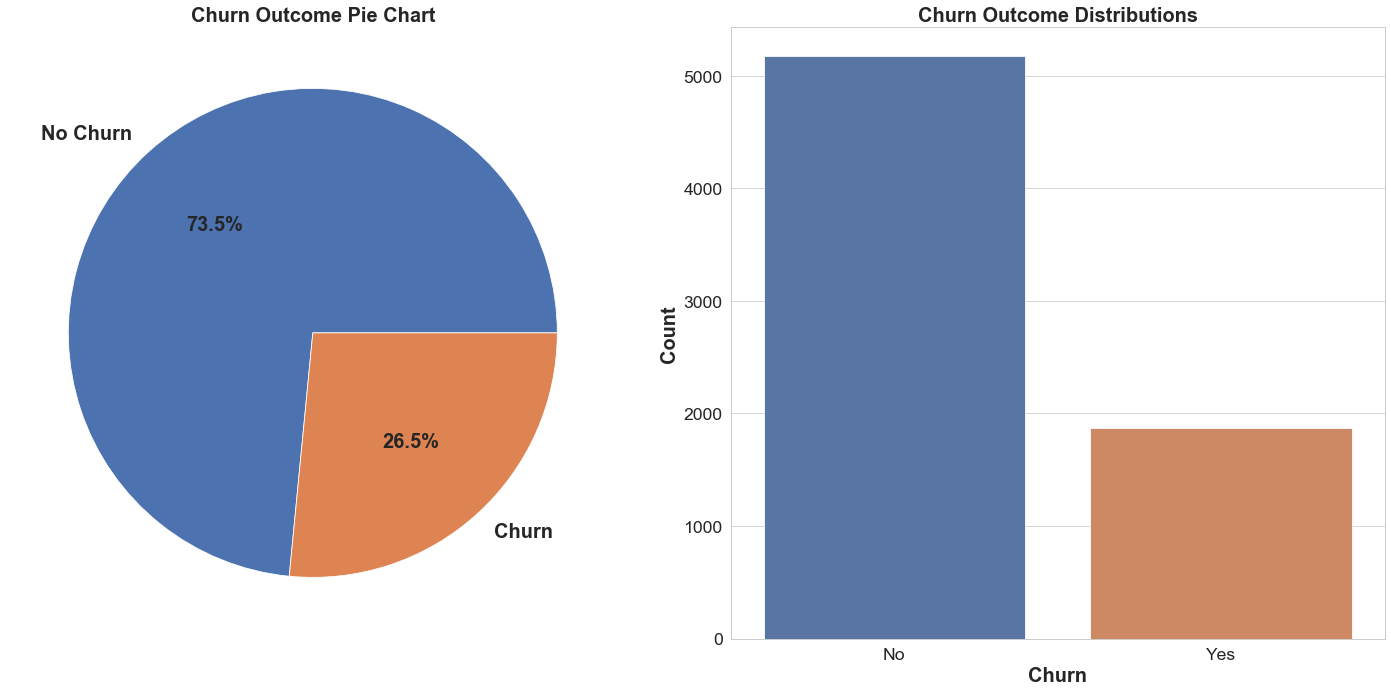

In [153]:
plot_target_dist(df)

# 2. Numerical Feature EDA

## 2.1 Kernel Density Estimations - Tenure, Monthly Charges, Total Charges

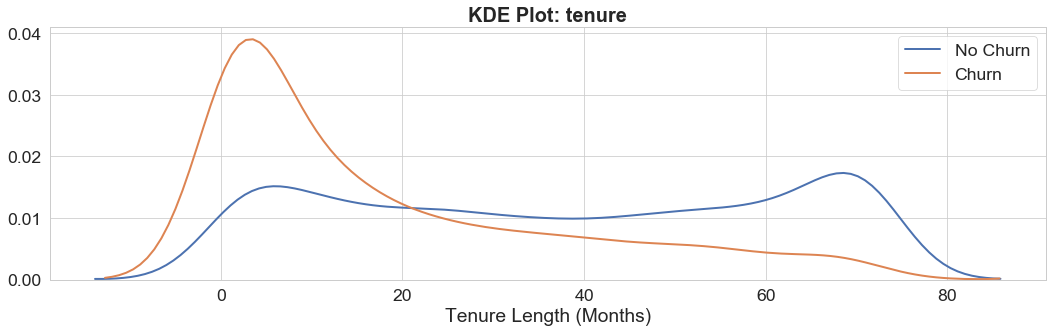

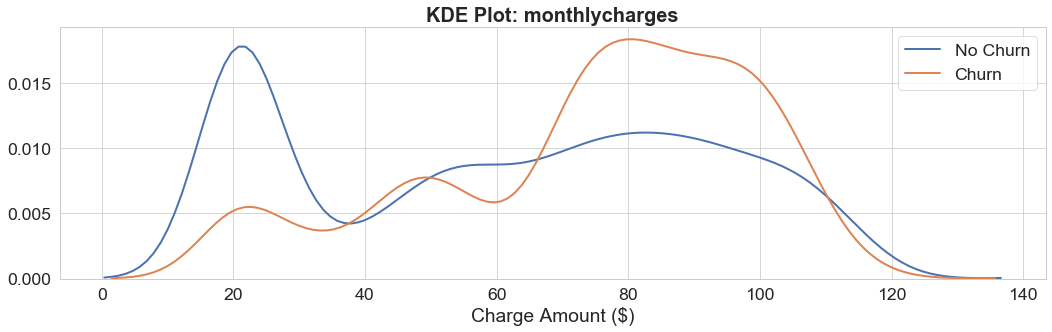

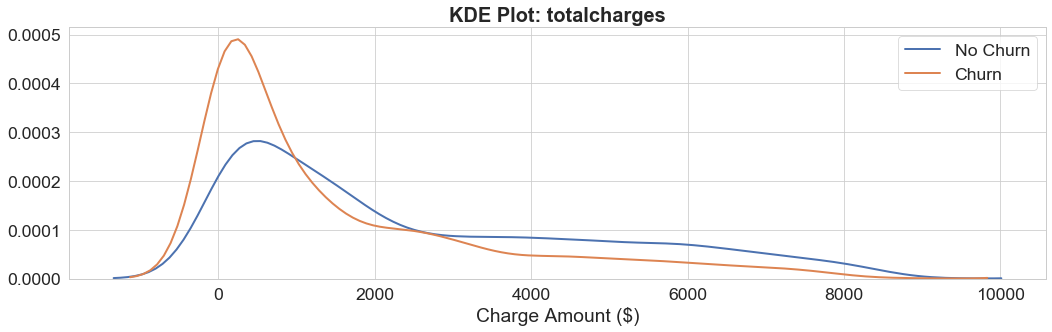

In [154]:
plot_kde(df, 'tenure')
plot_kde(df, 'monthlycharges')
plot_kde(df, 'totalcharges')

## 2.3 Grouping Tenure

In [155]:
df['grouped_tenure'] = df.apply(lambda df: tenure_groups(df), axis = 1)

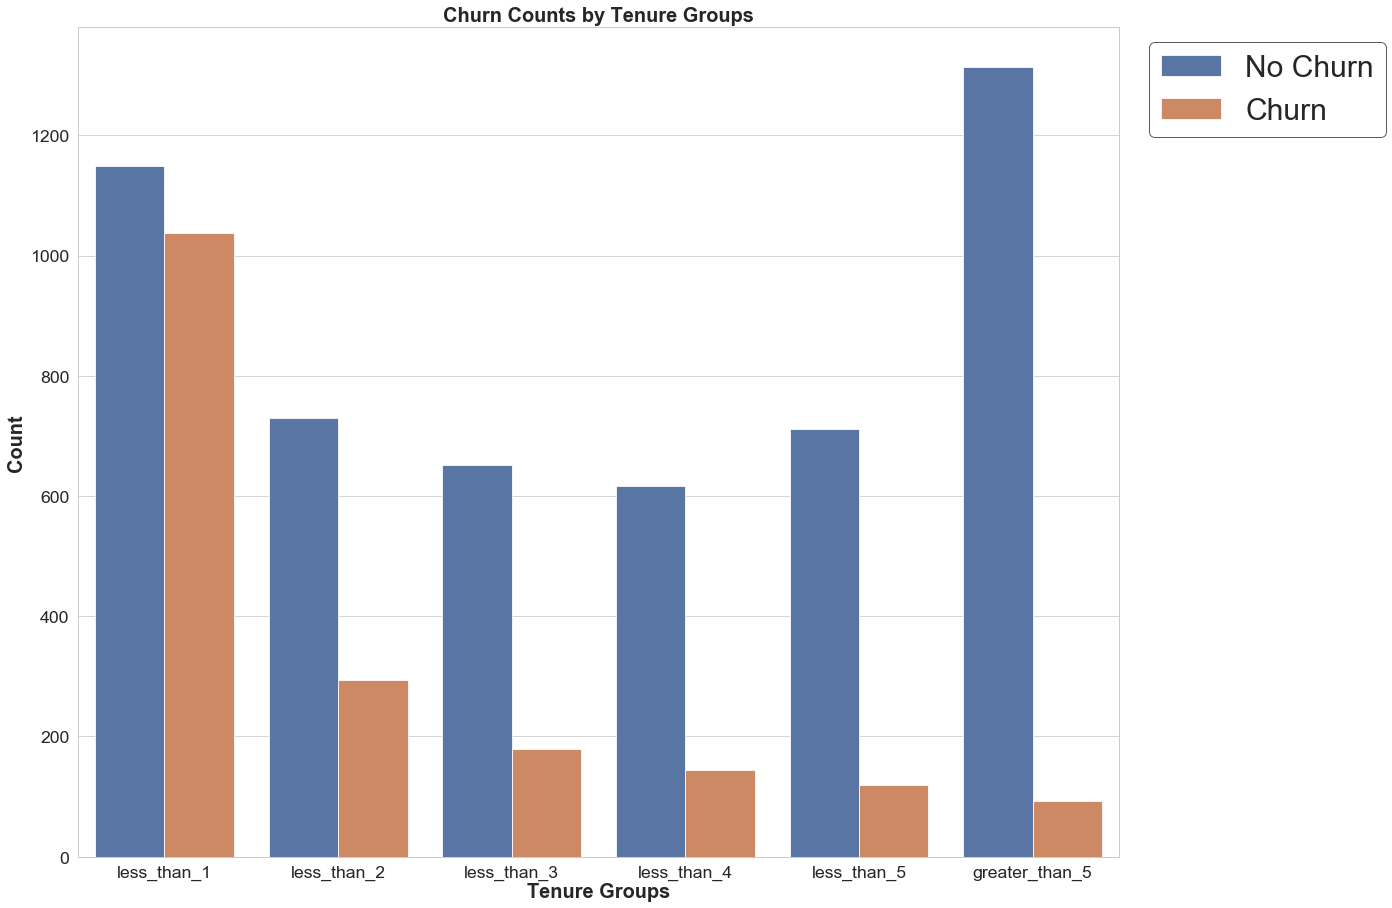

In [156]:
tenure_group_counts(df)

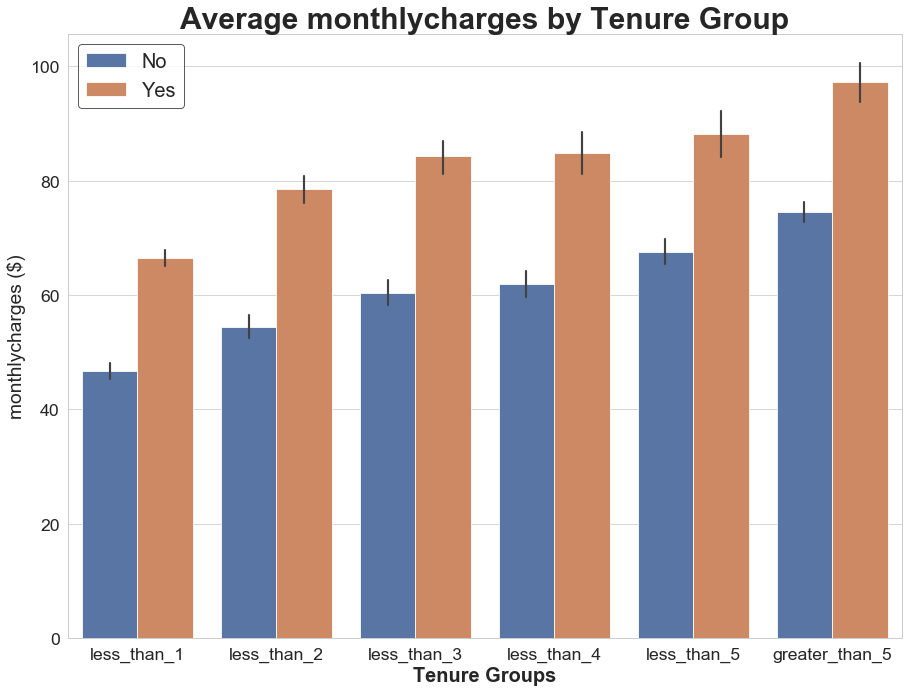

In [157]:
plot_numerical_averages(df, 'monthlycharges')

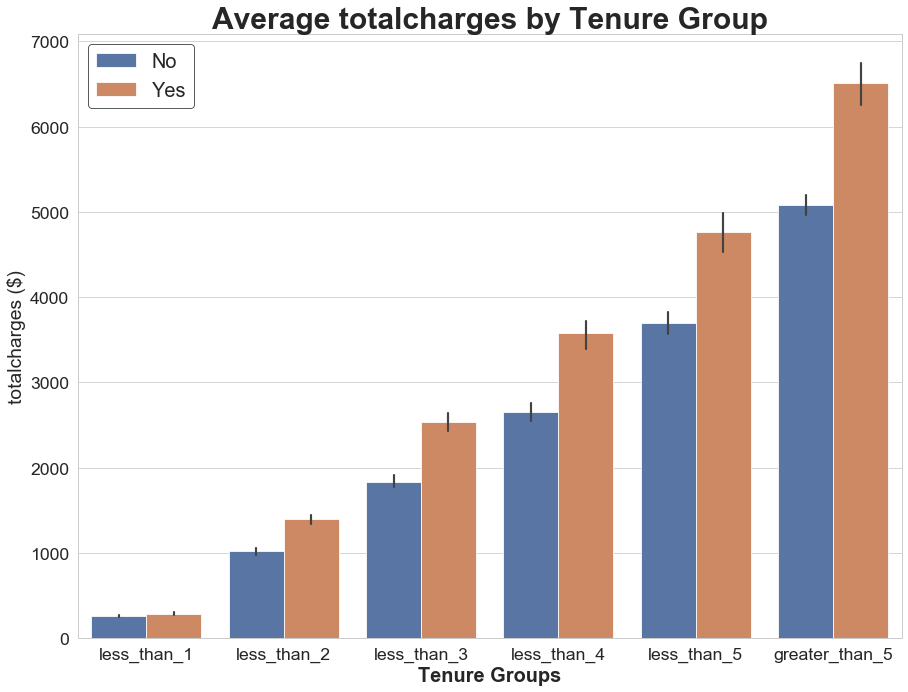

In [158]:
plot_numerical_averages(df, 'totalcharges')

**Numeric Variable Conclusions:**
- Tenure: Customers with lower service tenures (newer clients) have a higher probability of churning than those with long tenures.
- Monthly Charges: Generally speaking, Likelihood of a customer churning increases as charges increase, and customers have the highest probability of churning when their monthly charges exceed 60 dollars. Customers who do not churn are most likely to have bills around 20 dollars, followed by just over 80 dollars. 
- Total Charges: Distributions mostly too general for impact of feature (Monthly is most likely more important)

# 3. Categorical Features

## 3.1 Gender

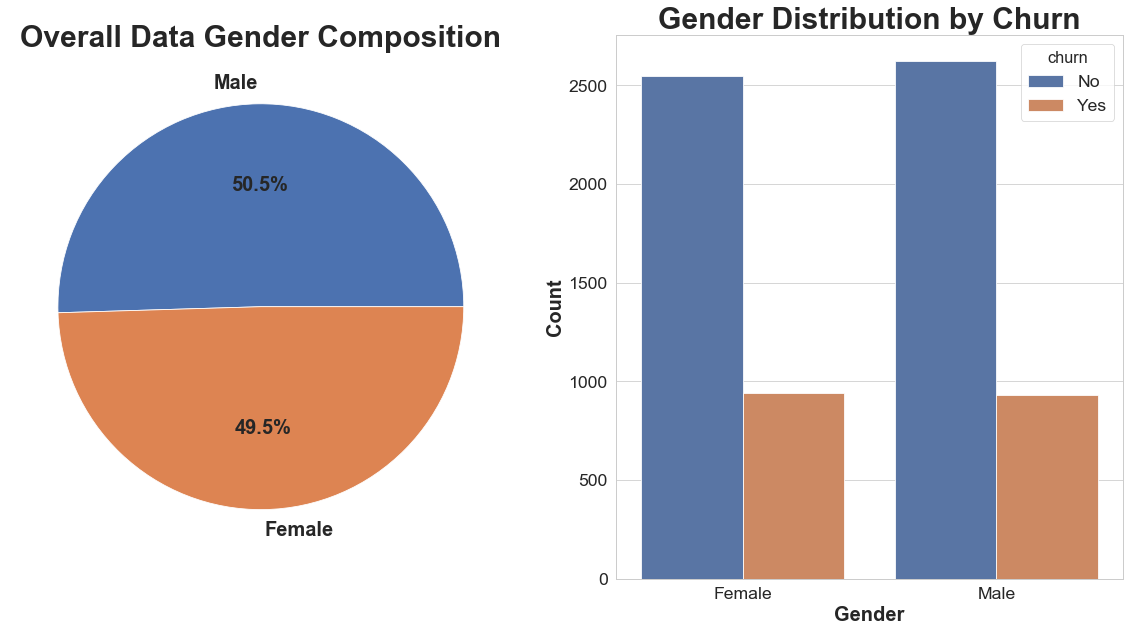

In [159]:
plot_gender_dist(df)

**Gender Conclusion:** Gender is equivalent in representation in our dataset and does not appear to be an indicator of Churn

## 3.2 Age

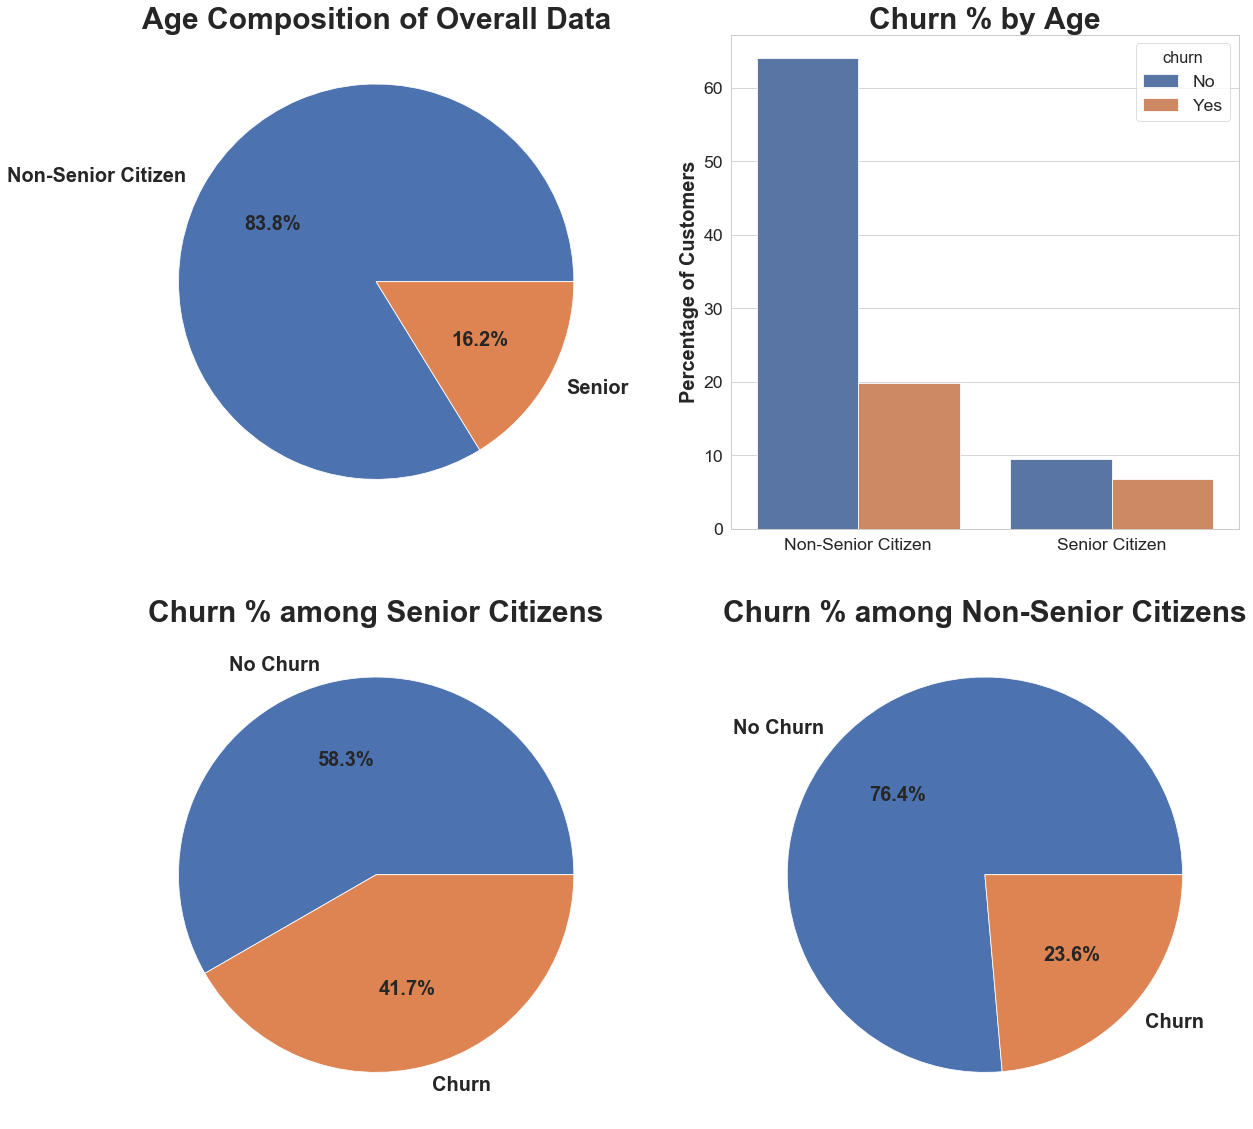

In [364]:
plot_age_dist(df)

**Age Conclusion:**
- Our dataset has significantly less senior citizens than non-seniors (only 16% are senior)
- *Overall*, more non-senior citizens churn than senior citizens
- A higher *proportion* of senior citizens churn than non-senior citizens

## 3.3 Partner & Dependents

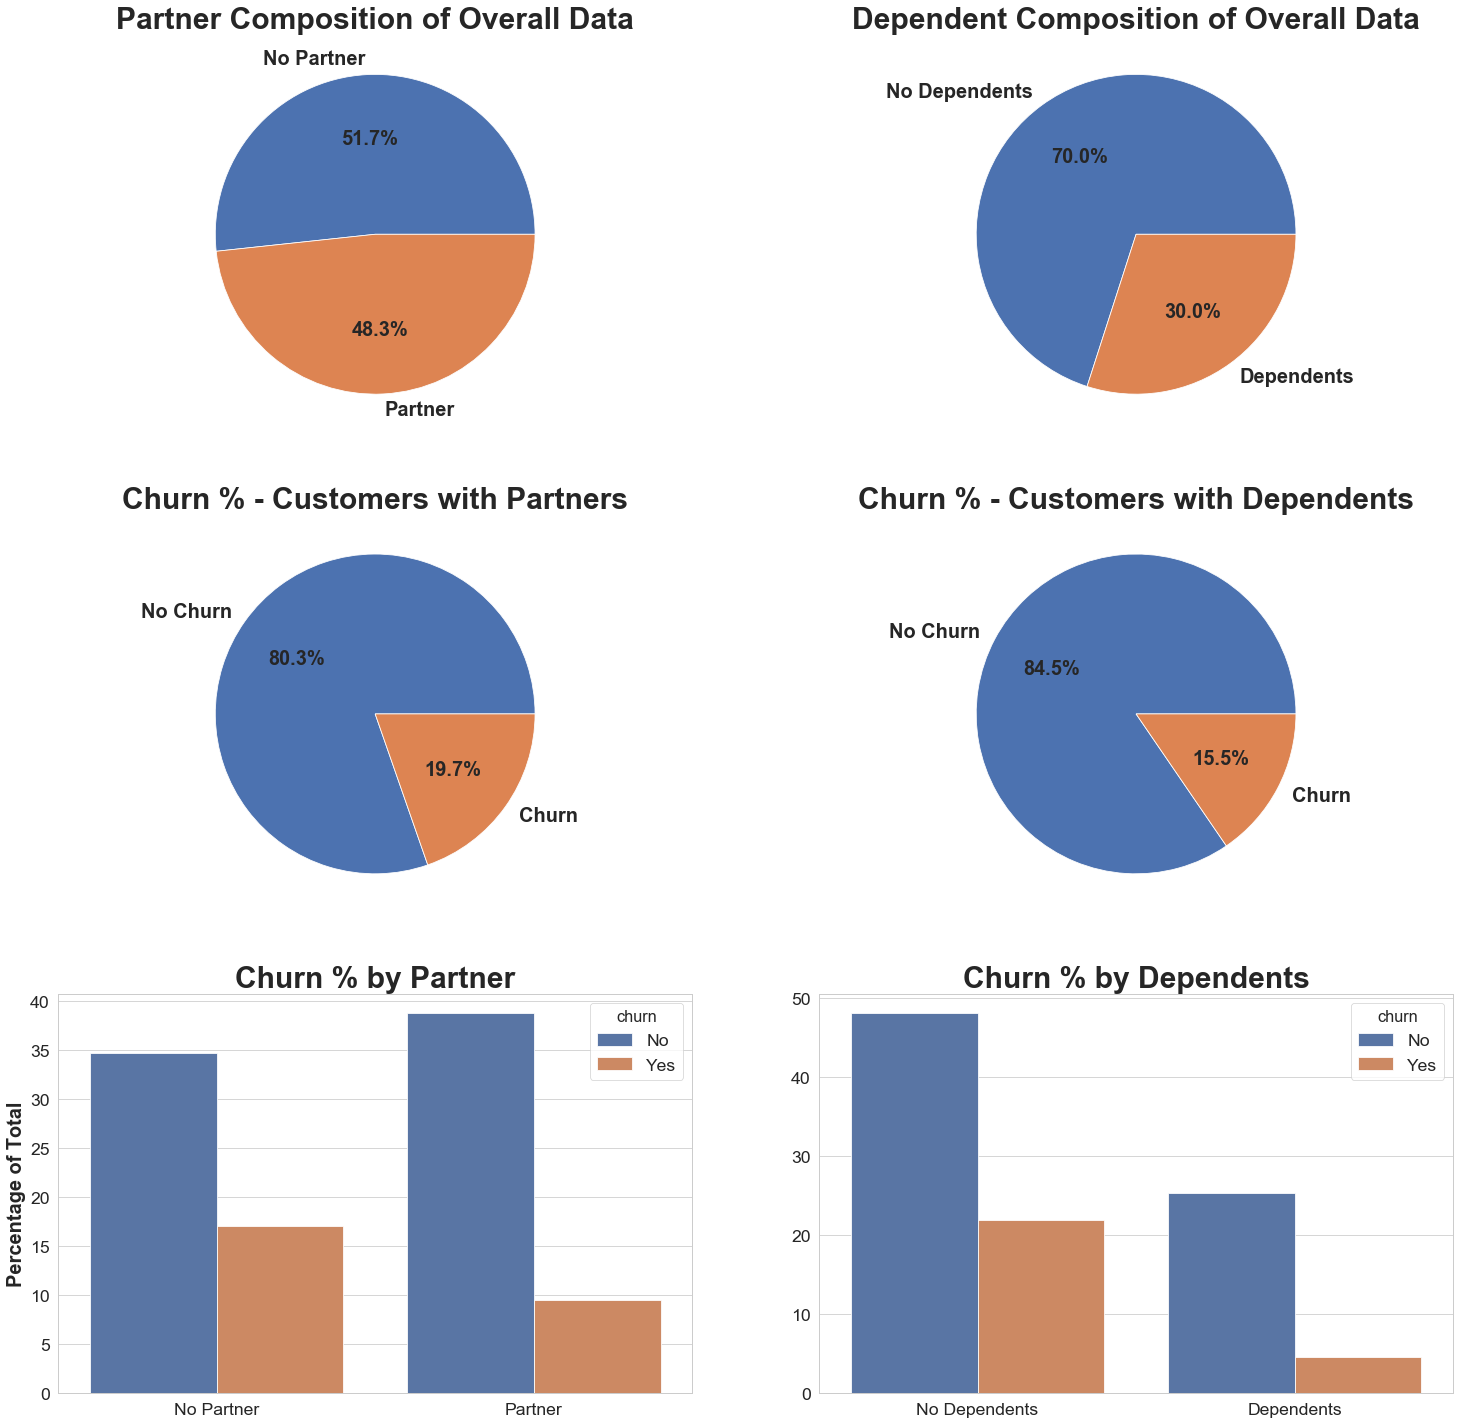

In [363]:
plot_partner_dependents(df)

**Partner/Dependent Conclusions:**
- Overall, those without partners are more likely to churn than those with partners
- Customers without dependents are more likely to churn than those with dependents

## 3.4 Phone Services & Line Quantities

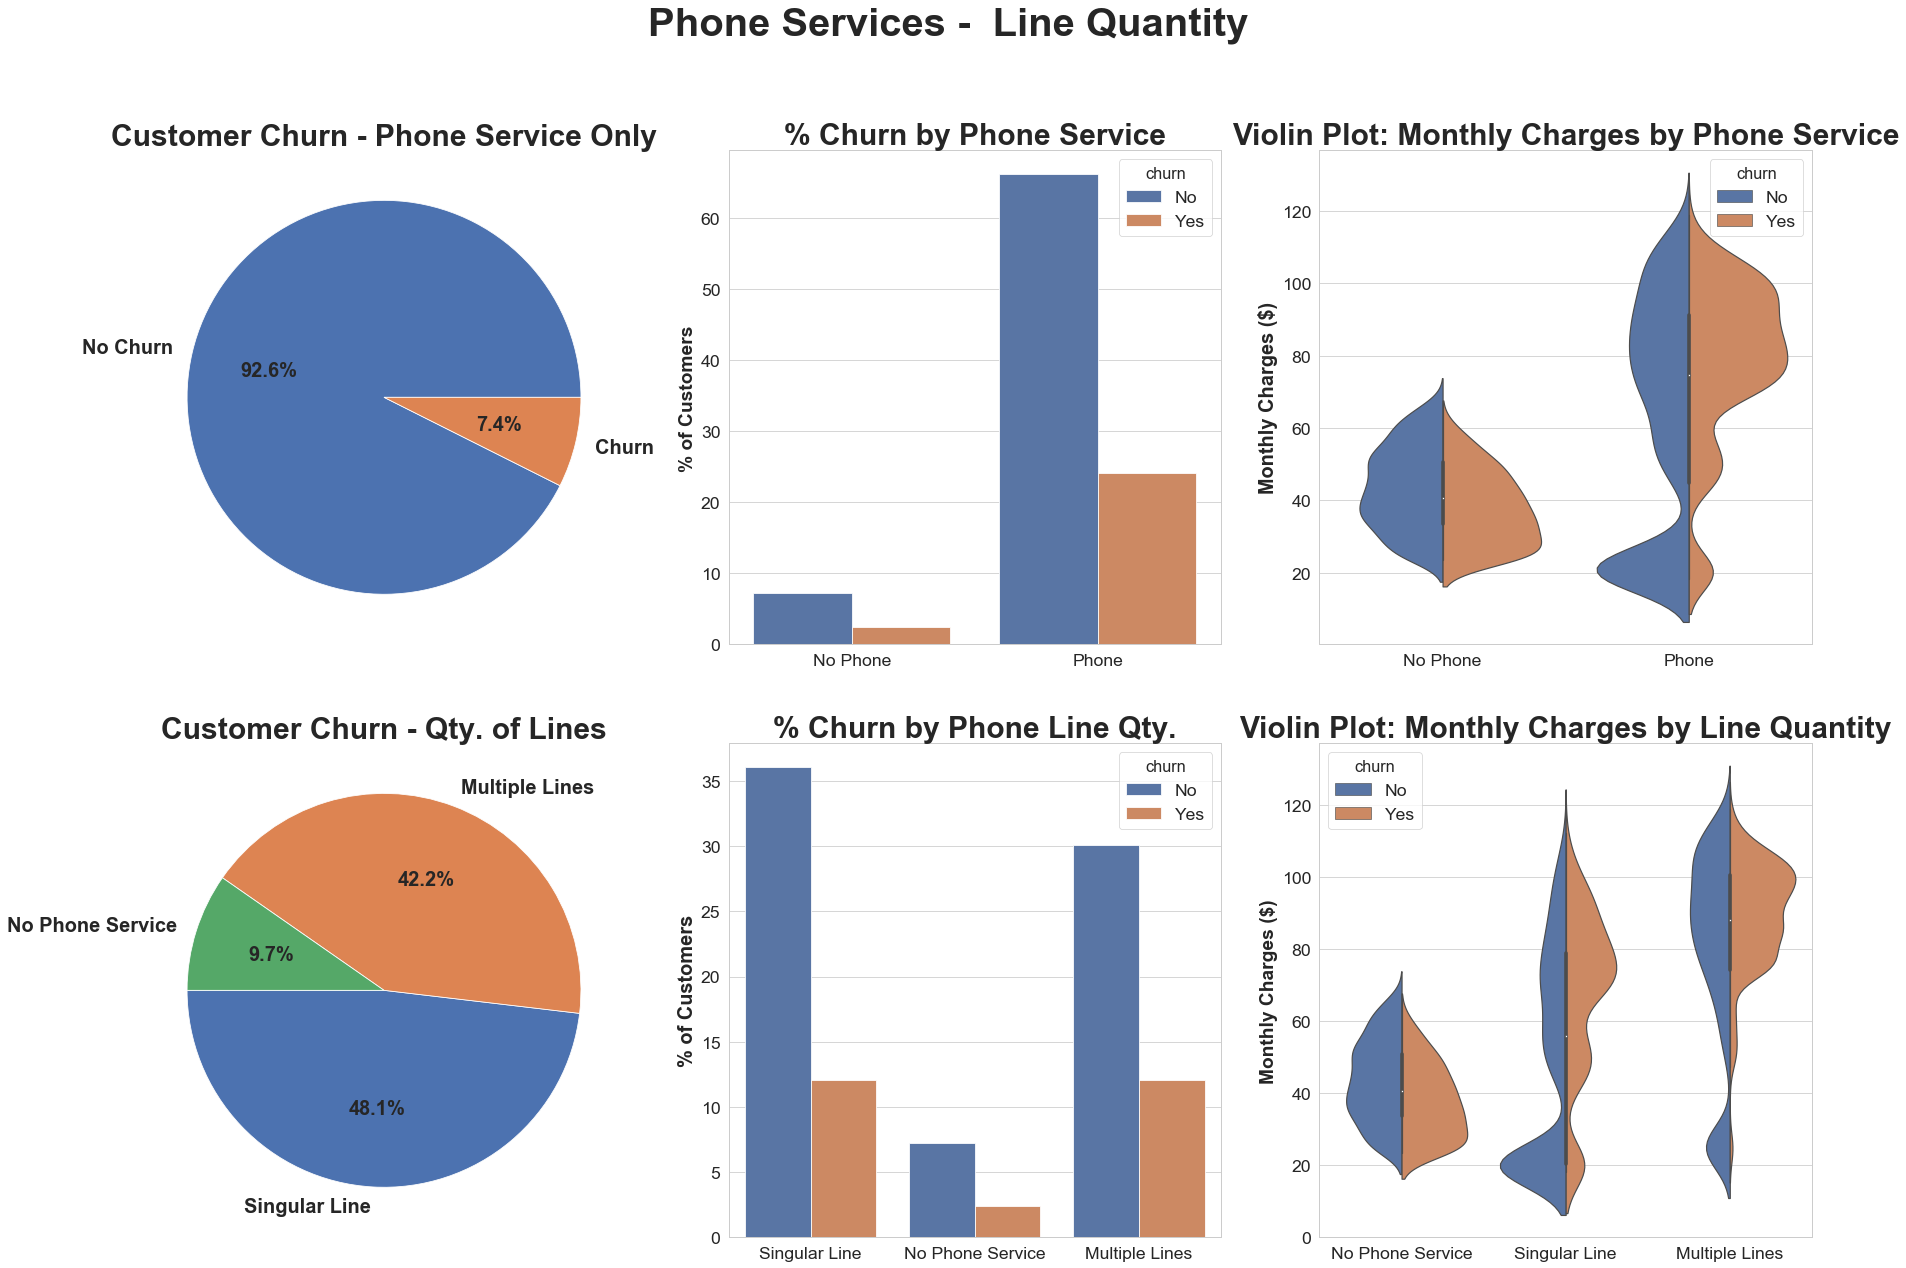

In [362]:
plot_services(df)

**Phone Service Conclusions:**
- Significantly more customers with only phone service will not churn than those other customers
- People with only phone service churn ~25% of the time
- Customers with phone services only pay a higher average monthly charge
- Customers with multiple lines churn at approximately the same rate as those with a singular line
- Customers with multiple lines more frequently pay a higher monthly charge than those with singular phone lines

## 3.5 Internet Service

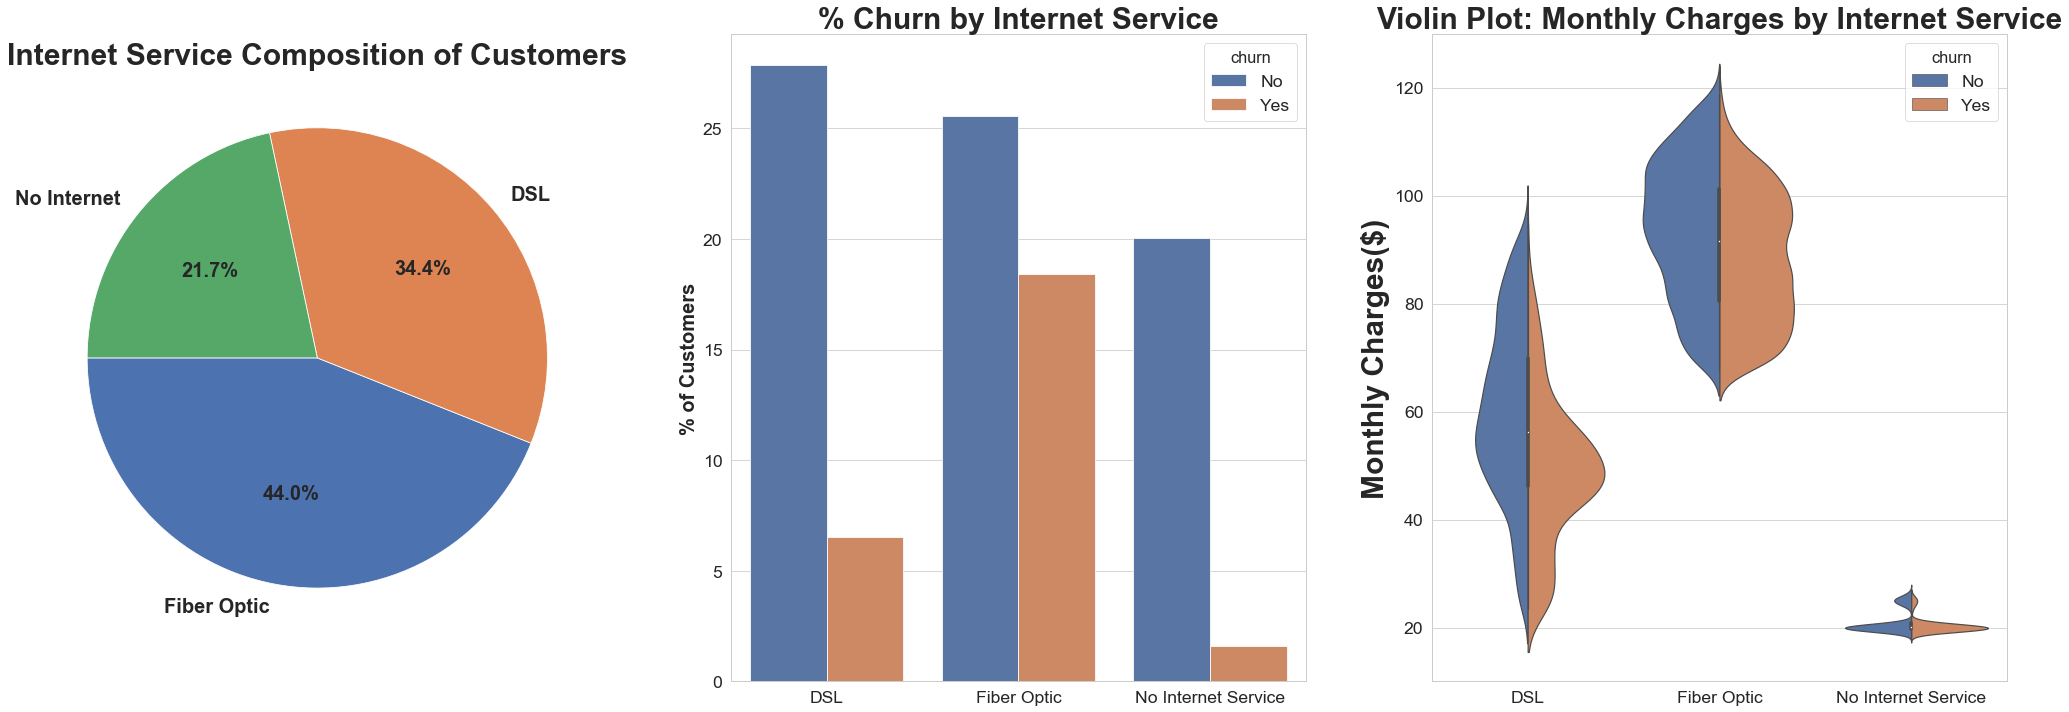

In [368]:
plot_internet_services(df)

## 3.6 Add-On Services

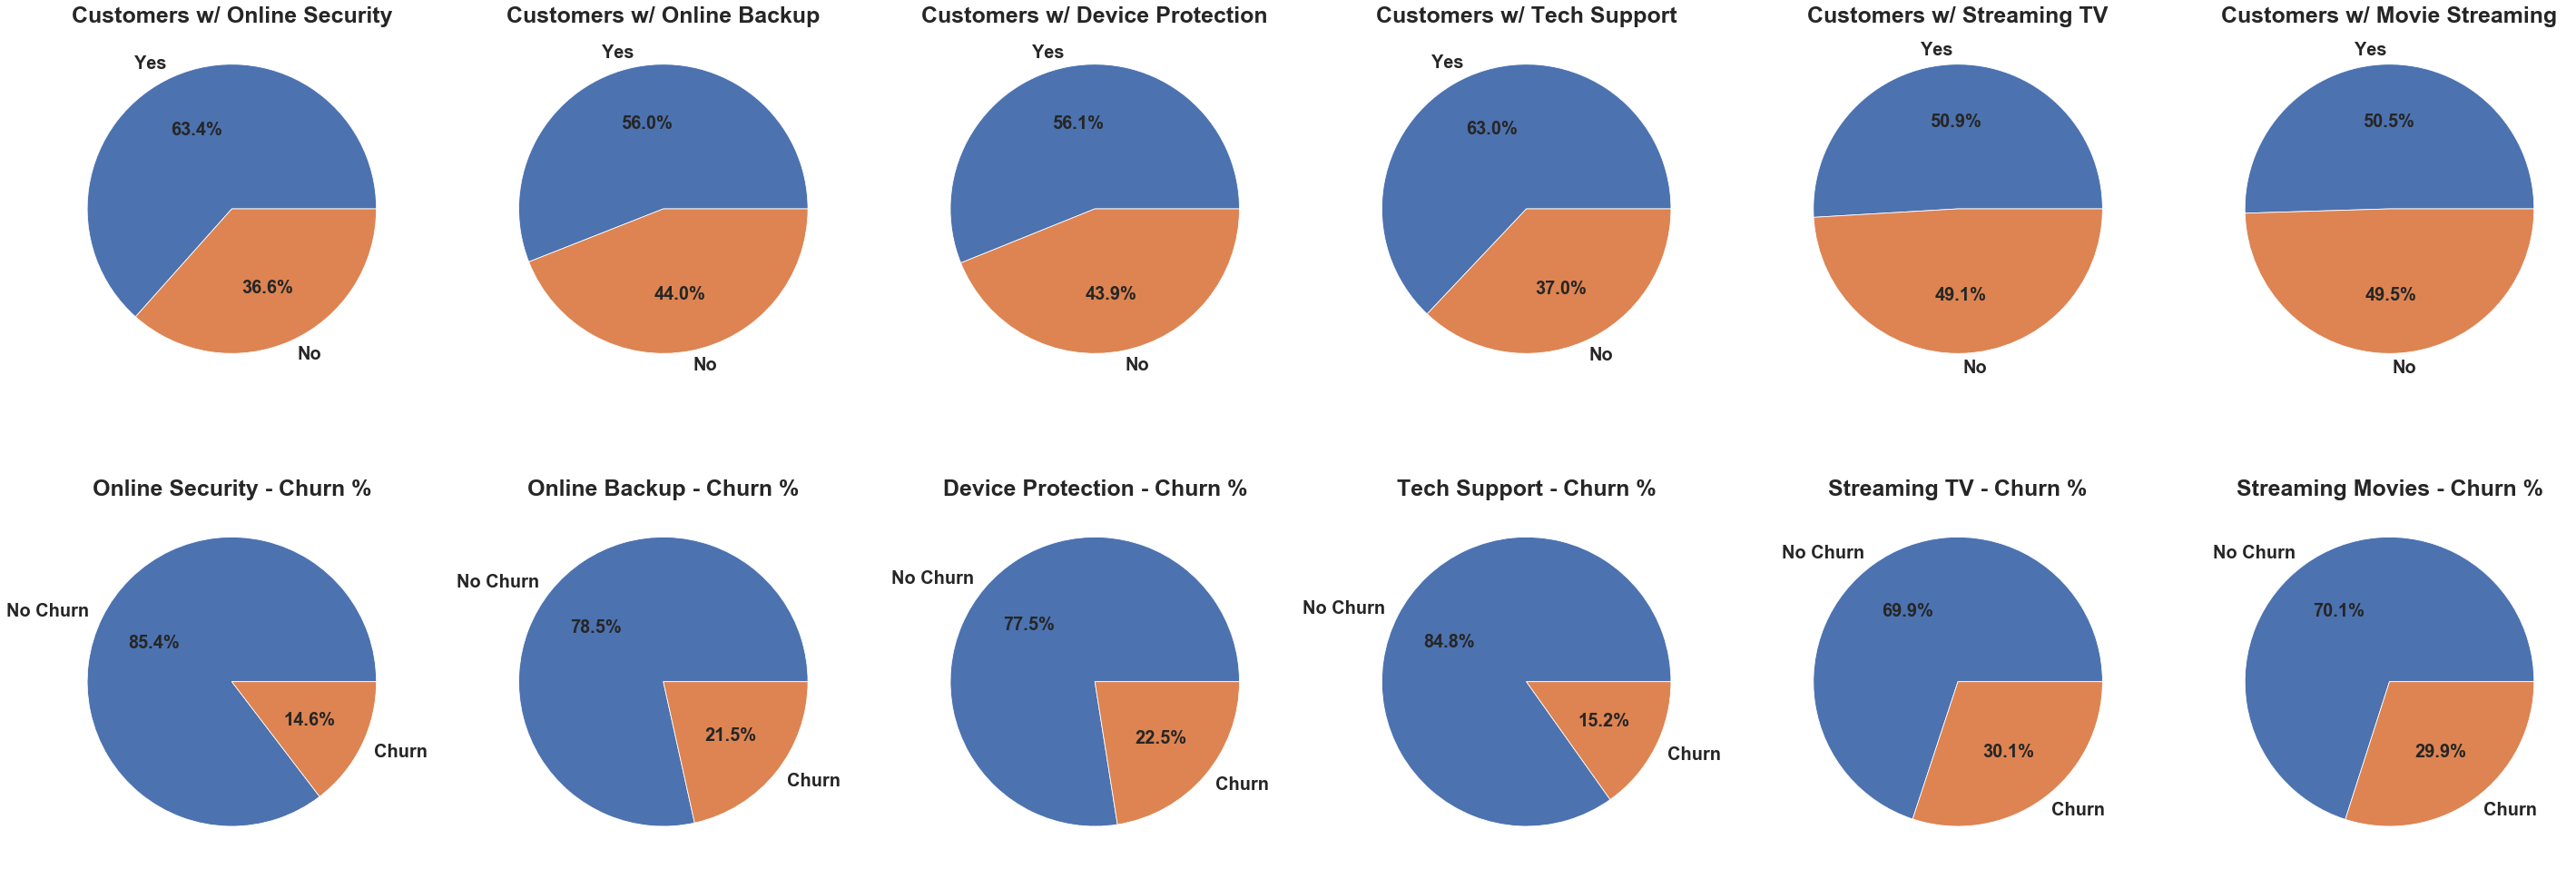

In [511]:
plot_services(df)

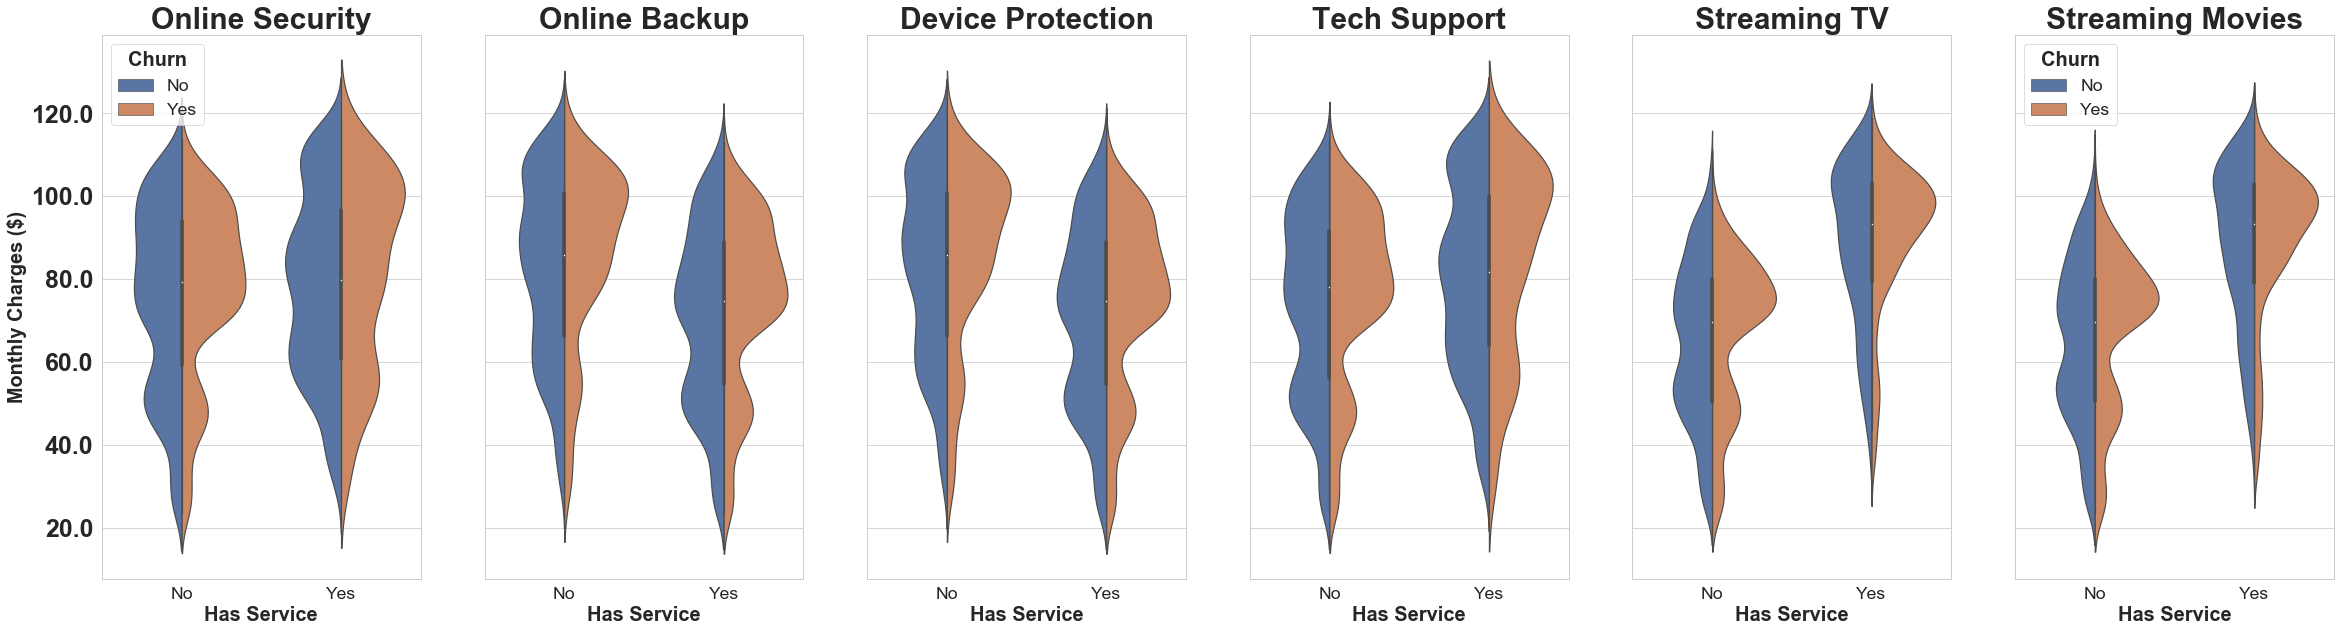

In [525]:
plot_service_charges(df)

**Add-On Service Conclusions:**
- Customers with TV Streaming and/or Movie streaming services churn more than all other services. 
- Churn for customers in most categories peaks around a monthly charge of $100

## 3.7 Contracts

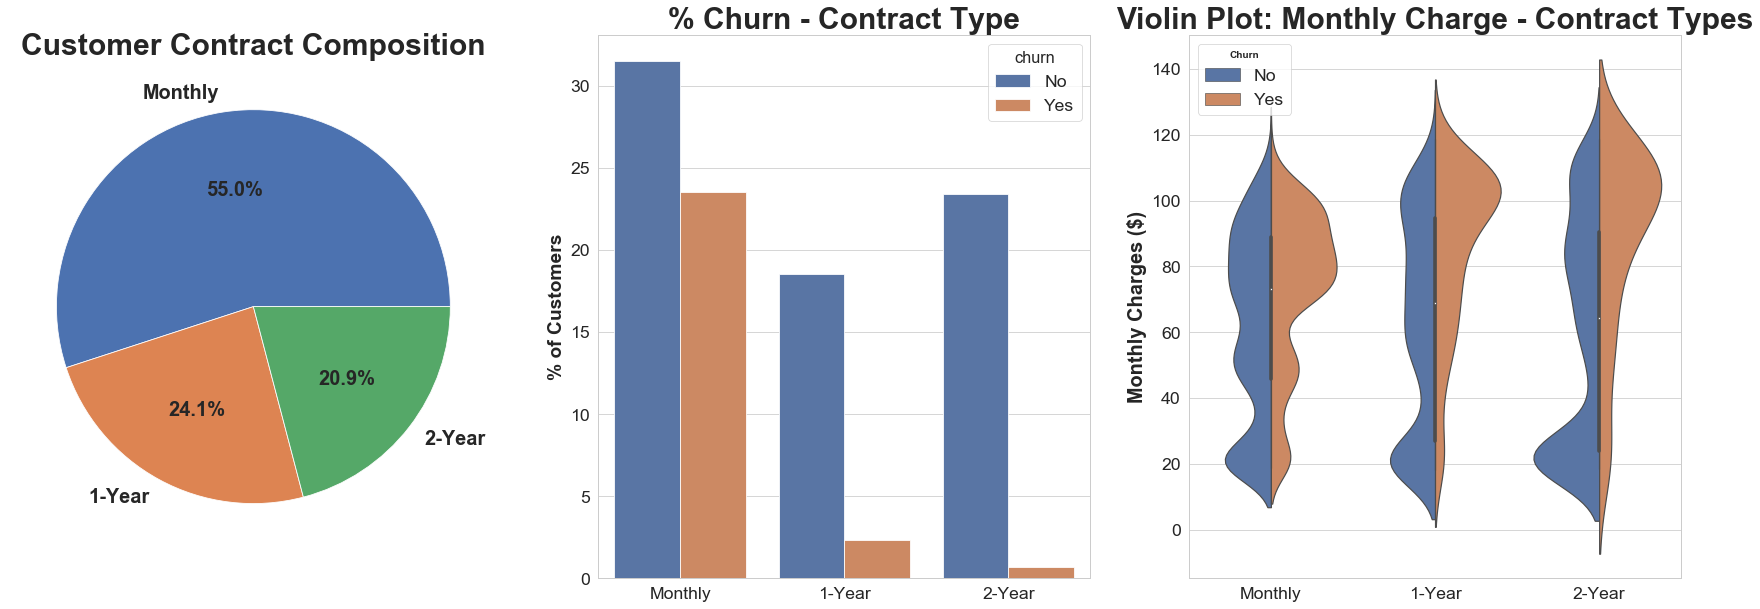

In [526]:
plot_contracts(df)

**Contract Conclusion:**
- More than half of customers use a monthly payment option
- Significantly more customers churn on monthly plans
- The longer the plan, the lower the churn rate
- Monthly charges are generally higher the longer the contract is

## 3.8 Paperless Billing

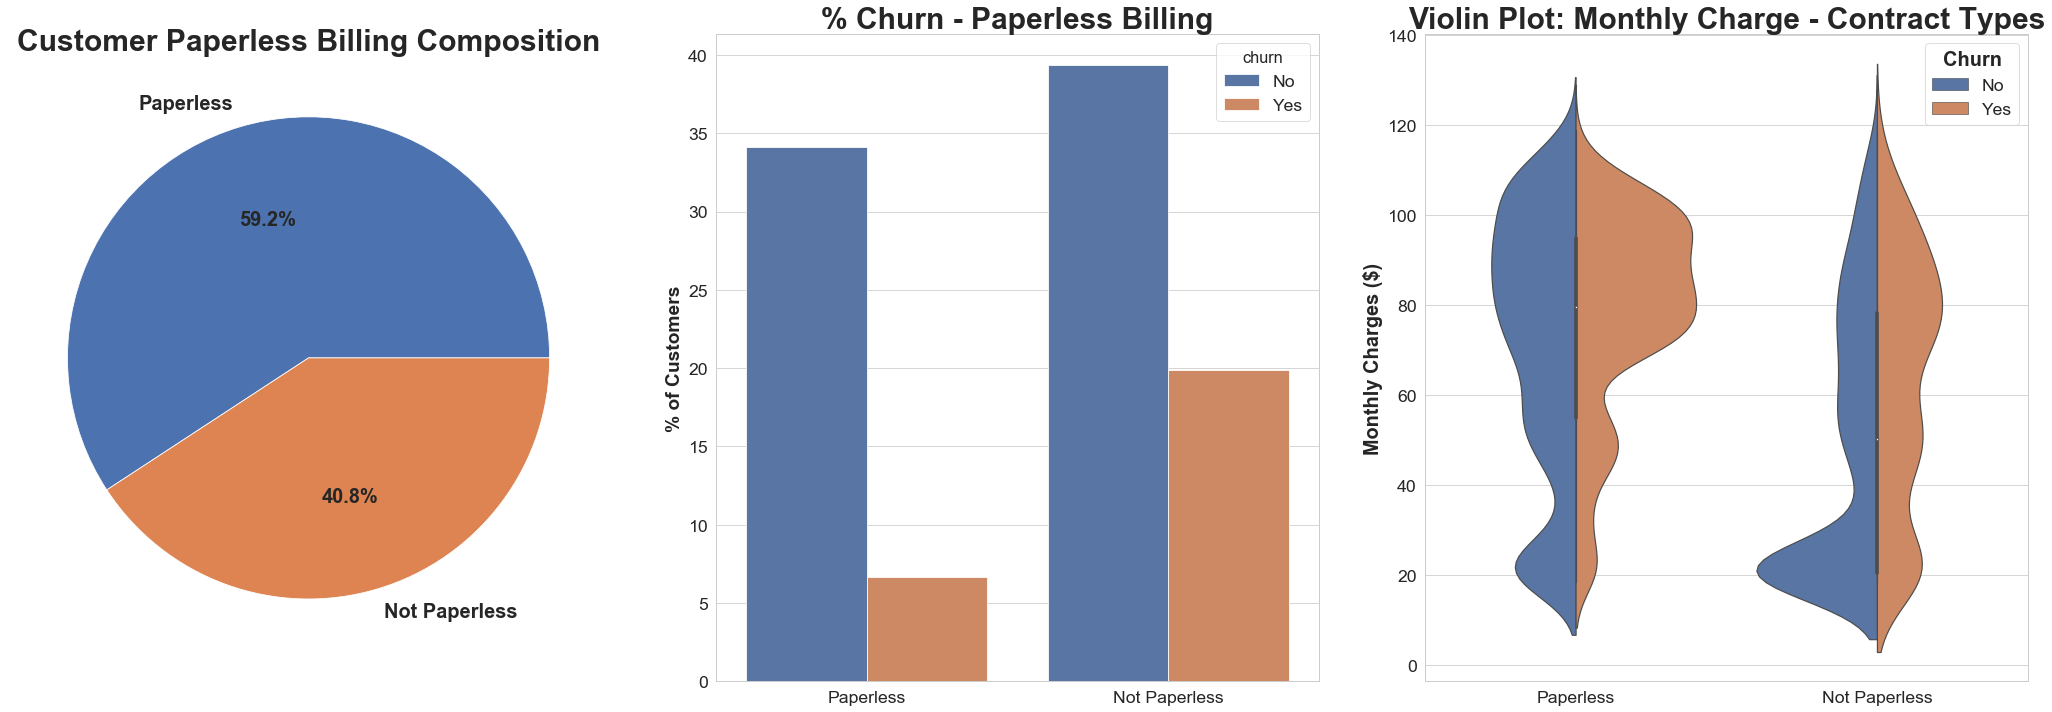

In [569]:
plot_paperless(df)

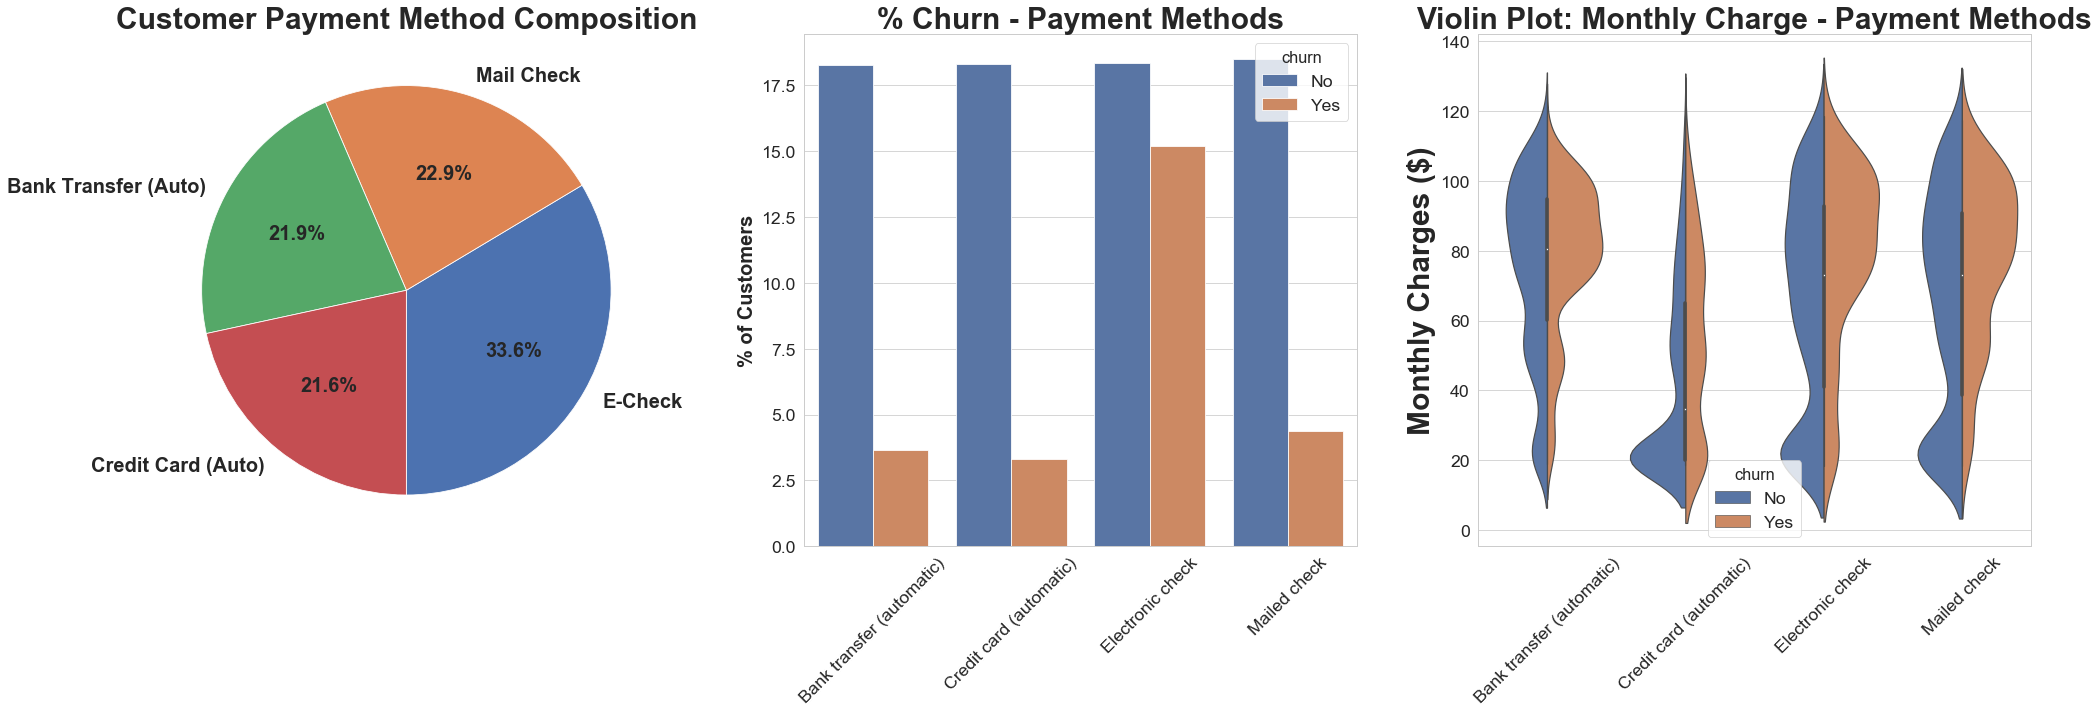

In [572]:
plot_pay_methods(df)

**Payments Conclusions:**
- Customers with non-paperless billing churn almost 15% more than paperless customers
- Paperless customers churn at similar rates as non-paperless customers when the monthly price is below 60 dollars, once above 60 more paperless customers churn than non-paperless
- Customers who pay with e-check churn more than 10% than customers with all other payment methods
- Customers who pay by credit card have consistent churn rates regardless of monthly charge, whereas customers paying by bank transfer, e-chcek, or mailed check all see an up-tick in churn once monthly charges rise above 60.
